# Part II: Battle of the Neighborhood

## Foursquare Call Limitation

With a personal account, even with 500 premium calls per day, each call will only generate 2 tips, regardless of how many the business actually has. Therefore, this investigation henceforth will only focus on apply its tips-to-wordcloud function towards reviews from one location. However, a script will be created, so **anyone with an enterprise account with Foursquare can execute the following.** 

In [2]:
#import libaries/packages; updated retroactively
import folium
import pandas as pd
import numpy as np
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
def wordcloud_tips(client_id, client_secret, version, venue_id, fig_length=10, fig_height=10):
    
    """"
    Create a word cloud from user tips(reviews) from Foursquare
        based on frequency and ranking after tokenizing and cleaning with
        NLTK
        
    Arguments:
        client_id -string- API client ID
        client_secret -string- API client secret
        version - string- client version 
        venue_id -string- unique identification code from API; also embedded in URL on Foursquare site
        fig_length-int- length of the output word cloud
        fig_height -int- height of word cloud
        
    Returns: 
        Plot of WordCloud object
    
    """
    #create the URL
    reviews_url = 'https://api.foursquare.com/v2/venues/{}/tips?&client_id={}&client_secret={}&v={}&limit=100&offset=100'.format(
            venue_id,
            client_id, 
            client_secret,
            version)

    #make the API request
    request = requests.get(url).json()
    
    #create data list of all tip text
    reviews = []
    
    for item in reviews['response']['tips']['items']:
        reviews.append(item['text'])
        
    ' '.join(reviews)
    
    #tokenize
    tokens = word_tokenize(reviews)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    # Lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove stopwords
    tokens = [word for word in tokens if not word in stopwords.words("english")]
    
    # Lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos = "v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos = "n") for word in tokens]
    
    #rejoin tokens into one string
    final_text = ' '.join(tokens)

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white', width = 800, height = 400).generate(final_text)

    # Display the generated image:
    plt.figure(figsize = (fig_length,fig_height))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


## A Demonstration

Since I do not possess an enterprise account, I cannot use the above function to generate all tips for any specific venue. Instead, a personal account is only limited to 2 tips per venue. To demonstrate, I've compiled data 30 tips from two popular venues in Houston by copying and pasting from the venue's site on Foursquare. 

In [3]:
dt_names = {'Restaurant Name': ['Brothers Tacos', 'Tout Suite'], 'Restaurant ID': ['4b3ee559f964a520f7a225e3','52fbacf0498eee18c0299165']}

dt_tips = [["They have great ground beef tacos, Chipotle chicken tacos, and enchiladas to die for. Everyday they have a $5 special that comes with beans and rice and very filling. Love this place!!"
               ,'Breakfast plate is reasonably priced and you get alot of food. I had to try the tacos de chicharron both in free and red salsa, both delicious. Overall great food and price.'
               , 'A hole in the wall Mexican joint at it''s finest. One of the few places to eat in downtown that''s downright cheap. Daily plate specials and $4 breakfast plates. Fresh cooked and fresh tortillas."'
               ,'"Meat tacos are great! Green salsa is really good! Quick and friendly service."'
               ,'"Get there early to avoid the long lines."','One of the top places for tacos! Line is always long but it moves quickly.'
               ,'"Tacos are delicious and cheap..try the picadillo and papa, and the papas a la mexicana..'
               ,'The only thing that could make the tacos better would be homemade tortillas. The papas y tocino is amazing!"','Try the chicharrones. They are stewed in a mild red sauce that''s enhanced with the addition of some of Brothers'' flavorful green salsa.'
               ,'Get there early for the link sausage and peppers! Once they run out, they don''t make any more.','Some of the best tacos in Houston. Get the mole if they have it!','An incredible place to get breakfast tacos on the way to work. Bring breakfast tacos and you will always be the employee of the month.','Great breakfast tacos. You will be in line, but it goes fast!','Decent and cheap bf tacos. Good migas, beans, and rice. Homemade flour tortillas but corn are packaged','All breakfast tacos, and lunch specials are off the chain','For as cheap as these tacos are, try as many as you like','Any of the breakfast tacos rock!!! Family owned place!!','Love their tacos and quesadillas','Get there very early for the best breakfast tacos','Everything ... huge tacos', 'Their breakfast tacos are masterful','While tacos may be their thing don''t hesitate to pick up a half dozen tamales','First time here. The chorizo tacos are very good. This place stays crowded','Spivey beef and chicken tacos','Spicy shredded chicken. Good','Everything','Houston Press 2012 Favorite Dishes - Tacos','Their pork & pollo tacos are a must, try them','Best tacos in Texas'],
              
             ['The coffee and macaroons are great. Impressive coffee menu. Ample space and multi-levelled seating. Overall liked the ambience of the place but it was a bit loud for me and the food was too buttery', 'Love this place. Not only the decor and ambience, but their food too. pastries are delicious. Their coffee selection is to make Starbucks cry. Tried the mushroom soup and the turkey sandwich love them','The place has a good vibe, employees are really nice, and food is awesome! I wish the portions were a bit bigger but the quality is there! And they have AWESOME pastries','The staff are so thoughtful. When the espresso machine was broken, not only did they give me a free drip coffee but they also gave me a free flat white when the machine was repaired a few hours later','Excellent selection of pastries. Coffee is amazing. Good is fantastic! Not to mention the staff is friendly and the ambiance of the place is great','The coffee is phenomenal. Try it with their house-made almond milk. The staff is amazingly friendly. Fast service & the good is delicious. Try the roasted Brussels sprouts--yum','The Bahn Mi sandwich is perfect. The scones are dry and crumbly as they should be. Open late too- great atmosphere','Enjoy good food in a warehouse atmosphere at this trendy internet cafe in EaDo. Looking for vegan brunch, lunch or dessert? This is the place','Great place to work, read, brunch with friends, large groups and eat dessert. Quality coffee. Cool vibe','Tout Suite coffee is awesome.I would love it if the wi fi password could be visible without asking the staff','Great atmosphere/service, excellent coffee, and delicious food. Try the avocado toast! Also, wifi works great and power outlets abound','If you get the french toast breakfast, plan on sharing it. It''s incredibly rich. More so than a lot of desserts I''ve had','Love this place! Pastry is always fresh and melts in your mouth. The tiramisu and the chocolate cupcake were divine','Definitely try the salted caramel macarons, and if you like fries, their fries and homemade ketchup is a must','Macaroons, Tacos, Blts, coffee. Oh my. This place is killer. Food and beverage are always on point','If you get a coffee drink with any form of steamed milk ask for it extra hot. For some reason the drinks come luke warm otherwise','Reminds me of the Chip and Joann’s “Magnolia” bakery, it’s so cute inside! Will definitely be my new study spot','The menu... Very cool vibe and a great dessert/coffee selection','I loved the environment, coffee, and options. They need more outlets that work though. A lot of tables have outlets but they are not functioning','Great atmosphere, coffee, and food. The macarons looked great, and you can get 4 for the price of 3 on Mondays','Their macaroons are pretty good...absolutely love the ambience here','If you get one of their juices in a glass bottle bring it back for $1 off your next purchase','Try the Tarragon Chicken sandwich with the chips. It''s awesome','Great spot for getting some work done. Lots of seating','Everything is great. Especially the desserts. I''ve gained a couple of pounds. Hmmmm good. Japattack','Lemon blueberry scone is everything! Adorable decor and delicious coffee & baked goods','he wifi never, ever works. Avoid if you need to get work done. Otherwise the mini coconut creme pies are magnificent','Possibly the only place in all of Houston where they know how to make a real Cafe Macchiato','Fancy! They even have an excellent macaroons collection','Coffee by greenway-excellent! Macaroons were also tasty']]

df = pd.DataFrame(dt_names)
df['Tips'] = dt_tips
df

,Restaurant Name,Restaurant ID,Tips
0,Brothers Tacos,4b3ee559f964a520f7a225e3,"[They have great ground beef tacos, Chipotle c..."
1,Tout Suite,52fbacf0498eee18c0299165,[The coffee and macaroons are great. Impressiv...


In [202]:
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

#This is a truncated, demo version of the above function without the API call

def demo_tips_to_text(text, fig_length=10, fig_height=10):

    """
    Creates a wordcloud of a list of tips of a venue.
    
    Arguments:
        text - list - iterable list of tips compiled for a venue

    Returns:
        Plotted Wordcloud of venue based on tips 

    """
    text = ' '.join(text)
    
    tokens = word_tokenize(text)
    # Remove the punctuations
    tokens = [word for word in tokens if word.isalpha()]
    # Lower the tokens
    tokens = [word.lower() for word in tokens]
    # Remove stopword
    tokens = [word for word in tokens if not word in stopwords.words("english")]
    # Lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos = "v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos = "n") for word in tokens]

    #rejoin tokens into one string
    final_text = ' '.join(tokens)

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white', width = 800, height = 400).generate(final_text)

    # Display the generated image:
    plt.figure(figsize = (fig_length,fig_height))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

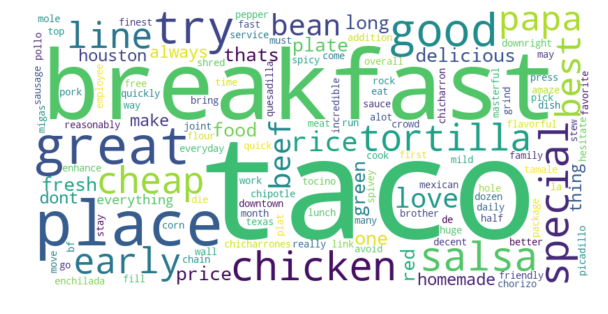

In [203]:

text = df['Tips'][0]

#Wordcloud for Brothers Tacos
demo_tips_to_text(text)

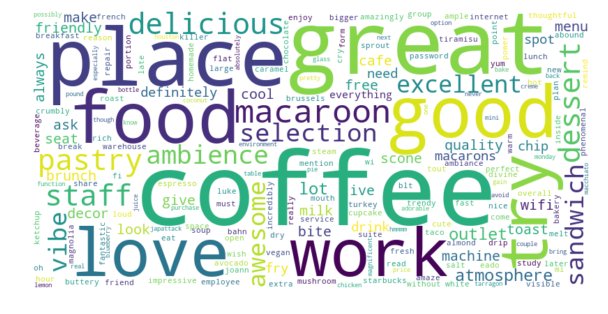

In [213]:
text = df['Tips'][1]

#Wordcloud for Tout Suite
demo_tips_to_text(text)

# Summary

There is something to be said about the amount of information presented in a word cloud. It experiences explicitly more information about the venue than a 1-5 rating system but also doesn't bog down the user too much. Within the span of a few spends, users have the ability to determine if a venue is worth their time and money without having to dwell on numerous reviews that could end up causing them to second-guess their decisions. 

Of course, this is by no means a comprehensive synoposis of any location; some words lack meaning when presented without context (e.g. *try*, *place*, and *early*), and menu recommendations are practically non-existent. However, discerning users can still decide to read through individual reviews for that information. 

Like ratings, this is also highly dependent on user feedback. For new restaurants, this wordcloud functionality can be highly skewed, but as with ratings, over time, this should reach an consensus.

# Future Considerations

- Considering creating a bigram version, as that may hold more information
- Allow specific wordclouds for categories like service, parking, etc.
- Implement sentiment analysis to further filteer out ambiguous words and generate wordclouds based on positive/negative word
  frequency and ranking.

